**Maximum likelihood estimatation from observed and unobserved data**

You are given a bag containing red and blue coins. All the red coins have the same probability of heads. All the blue coins have the same probability of heads (possibly different from that of the red coins).

Your task is to estimate the proportion of red coins in the bag and the probability of heads for both the red and the blue coin.

In [1]:
import ipywidgets as widgets
prob_red = widgets.FloatSlider(min=0.0, max=1.0, description='prob_red')
prob_head_red = widgets.FloatSlider(min=0.0, max=1.0, description='head_red')
prob_head_blue = widgets.FloatSlider(min=0.0, max=1.0, description='head_blue')
display(prob_red, prob_head_red, prob_head_blue)

FloatSlider(value=0.0, description='prob_red', max=1.0)

FloatSlider(value=0.0, description='head_red', max=1.0)

FloatSlider(value=0.0, description='head_blue', max=1.0)

Use these widgets to control the model.

In [5]:
import random
def choose_coin():
    return 'R' if random.random() < prob_red.value else 'B'

def flip_coin(coin):
    uar = random.random()
    if coin == 'R':
        if uar < prob_head_red.value:
            return 'H'
    elif uar < prob_head_blue.value:
        return 'H'
    return 'T'

def flip_random_coin_n_times(n, hidden=False):
    coin = choose_coin()
    return ('_' if hidden else coin, ''.join([flip_coin(coin) for i in range(n)]))

def flip_m_random_coins_n_times(m, n, hidden=False):
    return [flip_random_coin_n_times(n, hidden) for i in range(m)]

Use the above methods to sample from the model. The optional parameter 'hidden' controls whether the colour of the coin is observed in the samples.

In [6]:
flip_m_random_coins_n_times(5, 100)

[('R',
  'HHHHHTHHHHHHTHHHHHHTHHHHHTHHHTTHHTHTHTHHTHHHHHHHTTHHHTHHHHHHHHHHHTHHHHTHHHHHHTHHTHHHHHHHHHTTHHTHHHHH'),
 ('B',
  'TTTHHTTTTTTTTTTTTTHTTTTTTTTTTTTHTHHTHTTTTTTTTTHTTTHTTTTTTHTTTHTTTTTHHTHTTHTTTTTHTTTTHTTTTTTTTTTTTTHH'),
 ('B',
  'THTTTTTTTHHHTTTTTTTTTTTTHTTHTHTTHTTTTTTTTTTTTTTTTHTHHTTTTHHTTHTHTTTHTTTHTTTHHHHTTTTHTTTTHHTTTTTTHHTT'),
 ('B',
  'THTTTTHTHTTTTTTTHTHTHTTTTTTTTTHTTTTTHHHTTHTHTTTTTTTTTTTTTTTTTTHHTTTTTHTTHTTTTTTHHTTTTHTTTHTTTTTTTTTT'),
 ('R',
  'HHHHHHHHTHHTHHTHHHTHHHHHHHHHHHTTHHHTHHHHHTTHHHHHHTHHHHHTHHHHHHTHHHHTTHHHHHHHHHHHHHHHHHTTHHHHHHHTTHTH')]

In [8]:
flip_m_random_coins_n_times(5, 100, hidden=True)

[('_',
  'TTTTTHTTTTTTTTTTTHTTHTTTHTTHTTTTTTTTTTHTHTTTTTTTTTTTTTTHTTHHTTTTTTTHTTHHTTTTTTTTTTTHTTHTTTTTTTTTTTTT'),
 ('_',
  'HHHTHHTHHHHHTHHHHHHHHHHHHHTHHHHHHHHHHHTHHHHHHHHHHTHHHHTHHTHTHHHHHHHHHHHHTHTHTTHTHHHTHHHHHTHHTHHHHHHH'),
 ('_',
  'HTTTTTTTTHTHTTTTTHHTTHHTTHTTTTTTTTHTHTTTHTTTHTTTTTHTHTTHHTTTHTTTTHTTTTTTTTTTTHTTHTTTTHHHTTTHTTHTHTHT'),
 ('_',
  'HHHHHTHHHHHHHTTHHHHHHHHHHHHHTHTHHHHTTHHHHHTHHHTHHTHTHTHHHHHTHHHHTHHTHHTHHHHHHHTHHTHHTHHTHHHTHTHHHHHT'),
 ('_',
  'TTTTHTTHTTTTHHTTTTTTTTTTTHTHTHTTHHTHHTTTTTHTHHTTTTTTTTHTHTTHTTTHTTTHTTTTHTTTHTTTTHTHTHTHTTHHTHTTTHHH')]

**TASK 1** Implement the following two functions to estimate parameters for the model in the observed case. Splitting the work into two separate functions will simplify things for the next task. 

* How could you measure the error in your estimates?
* How does the error decrease with the sample size?
* If you were only allowed to flip coins a total of N times how would you choose m (the number of coins) and n the number of times to flip each coin? Why?

In [14]:
def compute_sufficient_statistics(samples):
    # assert 'Implement me to compute the sufficient statistics for the model from the samples.'
    red_counter = 0
    red_head_counter = 0
    blue_head_counter = 0
    l = len(samples[0][1])
    for color, values in sample:
        if color == 'R':
            red_counter += 1
            red_head_counter += values.count('H')
        else:
            blue_head_counter += values.count('H')
    return red_counter/len(samples), red_head_counter / (l * red_counter), blue_head_counter / (l * blue_counter)


def mle(sufficient_statistics):
    # assert 'Implement me to compute mle parameter estimates given sufficient statistics.'
    return sufficient_statistics

**TASK 2** Given a sample from a single coin whose colour is unobserved, estimate the posterior probability that the coin is red, given some estimates of the model parameters.

* If you pass in the true model parameters (e.g. prob_red.value, prob_head_red.value and prob_head_blue.value), how quickly does the posterior change? Use the plot_distribution function to view this.
* How does this depend on the model parameters?

In [90]:
def compute_posterior_prob_red(sample, estimate_prob_red, estimate_prob_head_red, estimate_prob_head_blue):
    # assert 'Implement me to compute posterior probability that the sample came from the red coin.'
    h = sample.count('H')
    l = len(sample)
    p_x_r = estimate_prob_head_red**h * (1 - estimate_prob_head_red)**(l - h)
    p_x_b = estimate_prob_head_blue**h * (1 - estimate_prob_head_blue)**(l - h)
    return p_x_r * estimate_prob_red / (p_x_r * estimate_prob_red + p_x_b * (1 - estimate_prob_red))

**TASK 3** Reusing your code from Tasks 1 and 2, implement expectation maximization algorithm to find a (locally optimal) solution to the parameters when the colour of the coins is not observed.

In [198]:
import numpy as np
def compute_expected_statistics(samples, estimate_prob_red, estimate_prob_head_red, estimate_prob_head_blue):
    # assert 'Compute the sufficient statistics for this sample given these parameter estimates.'
    posterior_probs_red = np.array([
        compute_posterior_prob_red(
            sample[1], estimate_prob_red, 
            estimate_prob_head_red, 
            estimate_prob_head_blue
        ) for sample in samples
    ])
    
    heads_prob = np.array([sample[1].count('H') for sample in samples]) / len(samples[0][1])
    prob_red = posterior_probs_red.mean()
    prob_head_red = (heads_prob * posterior_probs_red).sum() / posterior_probs_red.sum()
    prob_head_blue = (heads_prob * (1 - posterior_probs_red)).sum() / (1 - posterior_probs_red).sum()
    return prob_red, prob_head_red, prob_head_blue

def expectation_maximization(samples, iterations, estimate_prob_red, estimate_prob_head_red, estimate_prob_head_blue):
    # assert 'Compute the mle parameter estimates for the model from a sample without labels. '
    history = []
    for i in range(iterations):
        estimate_prob_red, estimate_prob_head_red, estimate_prob_head_blue = compute_expected_statistics(
            samples, estimate_prob_red, estimate_prob_head_red, estimate_prob_head_blue
        )
        history.append(
        (estimate_prob_red, 
            estimate_prob_head_red, 
            estimate_prob_head_blue
        ))
    return history

In [210]:
def make_samples(prob_red, prob_head_red, prob_head_blue, length, size):
    samples = []
    for _ in range(size):
        coin = np.random.choice(['R', 'B'], p=[prob_red, 1 - prob_red])
        prob_head = prob_head_red if coin == 'R' else prob_head_blue
        samples.append((coin, ''.join(np.random.choice(['H', 'T'], size=length, p=[prob_head, 1 - prob_head]))))
    return samples


def run_em(samples, iterations):
    return expectation_maximization(samples, iterations, 0.5, 0.3, 0.9)

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

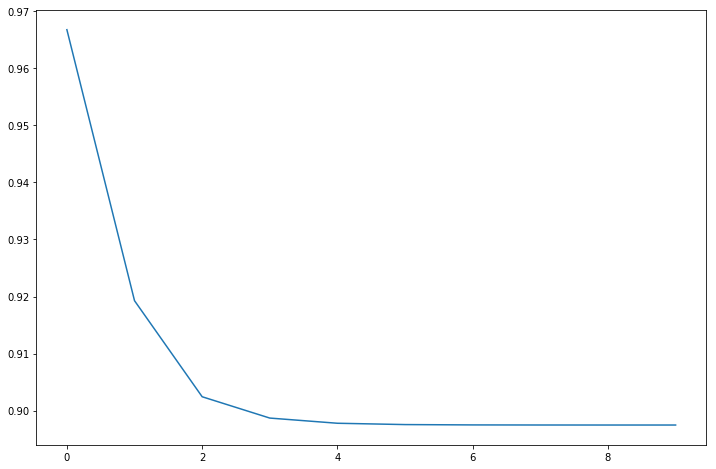

In [212]:
plt.figure(figsize=(12, 8))
samples = make_samples(0.9, 0.3, 0.6, 50, 1000)
history = run_em(samples, 10)
plt.plot(list(zip(*history))[0])

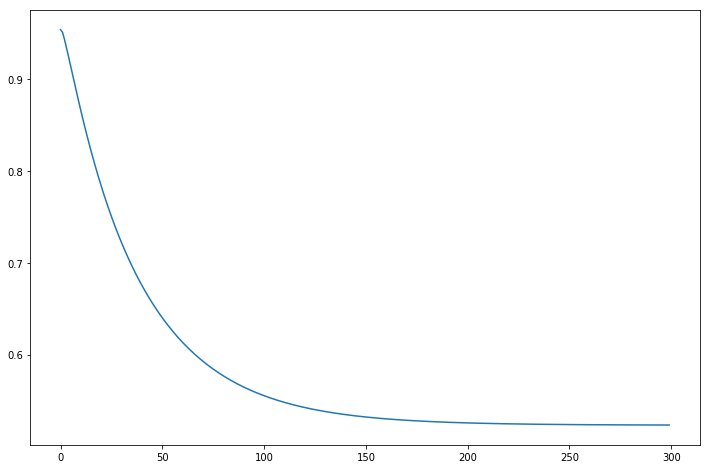

In [217]:
plt.figure(figsize=(12, 8))
samples = make_samples(0.6, 0.45, 0.55, 50, 1000)
history = run_em(samples, 300)
plt.plot(list(zip(*history))[0])

The closer prob head red and prob head blue are the longer EM converges